# Syntax Analysis Across Languages

The goal of this analysis is to observe the similarities betweeen languages, and mostly the differences. 

In linguistics, syntax (/ˈsɪntæks/) is the set of rules, principles, and processes that govern the structure of sentences (sentence structure) in a given language, usually including **word order**. The term syntax is also used to refer to the study of such principles and processes. The goal of many syntacticians is to discover the syntactic rules common to all languages. (Wikipedia Souce)


This analysis is focused on word order across:
- English
- French 
- German


For that the children's book "The Little Prince" from 'Antoine de Saint-Exupéry hase been studied in the above languages.

## Import data

In [46]:
import pandas as pd
import spacy
plt.rcParams["figure.figsize"] = (17,10)
nlp = spacy.load('en_core_web_sm')


In [47]:
little_prince_english = open('/Users/gz6009/Documents/Little_Prince.txt').read()

## Separate Sentence into words

In [48]:
introduction_doc = nlp(little_prince_english)
# Extract tokens for the given doc
print ([token.text for token in introduction_doc])

['Once', 'when', 'I', 'was', 'six', 'years', 'old', 'I', 'saw', 'a', 'magnificent', 'picture', 'in', 'a', 'book', ',', 'called', 'True', 'Stories', 'from', '\n', 'Nature', ',', 'about', 'the', 'primeval', 'forest', '.', 'It', 'was', 'a', 'picture', 'of', 'a', 'boa', 'constrictor', 'in', 'the', 'act', 'of', 'swallowing', 'an', '\n', 'animal', '.', 'Here', 'is', 'a', 'copy', 'of', 'the', 'drawing', '.', '\n\n', 'In', 'the', 'book', 'it', 'said', ':', '“', 'Boa', 'constrictors', 'swallow', 'their', 'prey', 'whole', ',', 'without', 'chewing', 'it', '.', 'After', 'that', 'they', '\n', 'are', 'not', 'able', 'to', 'move', ',', 'and', 'they', 'sleep', 'through', 'the', 'six', 'months', 'that', 'they', 'need', 'for', 'digestion', '.', '”', 'I', '\n', 'pondered', 'deeply', ',', 'then', ',', 'over', 'the', 'adventures', 'of', 'the', 'jungle', '.', 'And', 'after', 'some', 'work', 'with', 'a', 'coloured', '\n', 'pencil', 'I', 'succeeded', 'in', 'making', 'my', 'first', 'drawing', '.', 'My', 'Drawin

## Separate text into sentences

In [49]:
about_doc = nlp(little_prince_english)
sentences = list(about_doc.sents)
len(sentences)

for sentence in sentences:
        print (sentence)

Once when I was six years old I saw a magnificent picture in a book, called True Stories from 
Nature, about the primeval forest.
It was a picture of a boa constrictor in the act of swallowing an 
animal.
Here is a copy of the drawing. 


In the book it said: “Boa constrictors swallow their prey whole, without chewing it.
After that they 
are not able to move, and they sleep through the six months that they need for digestion.”
I 
pondered deeply, then, over the adventures of the jungle.
And after some work with a coloured 
pencil I succeeded in making my first drawing.
My Drawing Number One.
It looked like this: 





I showed my masterpiece to the grown-ups, and asked them whether the drawing frightened them. 

But they answered: “Frighten?
Why should any one be frightened by a hat?”
My drawing was not 
a picture of a hat.
It was a picture of a boa constrictor digesting an elephant.
But since the grown- 
ups were not able to understand it, I made another drawing: I drew the inside of

## Count Number of occurence of words

In [50]:
for token in about_doc:
     print (token, token.idx)

Once 0
when 5
I 10
was 12
six 16
years 20
old 26
I 30
saw 32
a 36
magnificent 38
picture 50
in 58
a 61
book 63
, 67
called 69
True 76
Stories 81
from 89

 94
Nature 95
, 101
about 103
the 109
primeval 113
forest 122
. 128
It 130
was 133
a 137
picture 139
of 147
a 150
boa 152
constrictor 156
in 168
the 171
act 175
of 179
swallowing 182
an 193

 196
animal 197
. 203
Here 205
is 210
a 213
copy 215
of 220
the 223
drawing 227
. 234


 236
In 238
the 241
book 245
it 250
said 253
: 257
“ 259
Boa 260
constrictors 264
swallow 277
their 285
prey 291
whole 296
, 301
without 303
chewing 311
it 319
. 321
After 323
that 329
they 334

 339
are 340
not 344
able 348
to 353
move 356
, 360
and 362
they 366
sleep 371
through 377
the 385
six 389
months 393
that 400
they 405
need 410
for 415
digestion 419
. 428
” 429
I 431

 433
pondered 434
deeply 443
, 449
then 451
, 455
over 457
the 462
adventures 466
of 477
the 480
jungle 484
. 490
And 492
after 496
some 502
work 507
with 512
a 517
coloured 519

 528
pe

was 7171
revealed 7175
to 7184
me 7187
. 7189


 7191
The 7193
first 7197
time 7203
he 7208
saw 7211
my 7215
air 7218
- 7221
plane 7222
, 7227
for 7229
instance 7233
( 7242
I 7243
shall 7245
not 7251
draw 7255
my 7260
air 7263
- 7266
plane 7267
; 7272
that 7274
would 7279
be 7285
much 7288

 7293
too 7294
complicated 7298
for 7310
me 7314
) 7316
, 7317
he 7319
asked 7322
me 7328
: 7330
“ 7332
What 7333
is 7338
that 7341
object 7346
? 7352
” 7353


 7355
“ 7357
That 7358
is 7363
not 7366
an 7370
object 7373
. 7379
It 7381
flies 7384
. 7389
It 7391
is 7394
an 7397
air 7400
- 7403
plane 7404
. 7409
It 7411
is 7414
my 7417
air 7420
- 7423
plane 7424
. 7429
” 7430
And 7432
I 7436
was 7438
proud 7442
to 7448
have 7451
him 7456

 7460
learn 7461
that 7467
I 7472
could 7474
fly 7480
. 7483
He 7485
cried 7488
out 7494
, 7497
then 7499
: 7503
“ 7505
What 7506
! 7510
You 7512
dropped 7516
down 7524
from 7529
the 7534
sky 7538
? 7541
” 7542




 7544
“ 7548
Yes 7549
, 7552
” 7553
I 7555
answered 7

, 14954
trees 14956
as 14962
big 14965
as 14969
castles 14972
; 14979
and 14981
that 14985
even 14990
if 14995
he 14998

 15001
took 15002
a 15007
whole 15009
herd 15015
of 15020
elephants 15023
away 15033
with 15038
him 15043
, 15046
the 15048
herd 15052
would 15057
not 15063
eat 15067
up 15071
one 15074
single 15078
baobab 15085
. 15091


 15093
The 15095
idea 15099
of 15104
the 15107
herd 15111
of 15116
elephants 15119
made 15129
the 15134
little 15138
prince 15145
laugh 15152
. 15157
“ 15159
We 15160
would 15163
have 15169
to 15174
put 15177
them 15181
one 15186
on 15190

 15193
top 15194
of 15198
the 15201
other 15205
, 15210
” 15211
he 15213
said 15216
. 15220
But 15222
he 15226
made 15229
a 15234
wise 15236
comment 15241
: 15248


 15250
“ 15252
Before 15253
they 15260
grow 15265
so 15270
big 15273
, 15276
the 15278
baobabs 15282
start 15290
out 15296
by 15300
being 15303
little 15309
. 15315
” 15316


 15318
“ 15320
That 15321
is 15326
strictly 15329
correct 15338
, 15345
” 153

myself 23139
, 23145
one 23147
flower 23151
which 23158
is 23164
unique 23167
in 23174
the 23177
world 23181
, 23186
which 23188
grows 23194
nowhere 23200
but 23208
on 23212
my 23215
planet 23218
, 23224
but 23226

 23230
which 23231
one 23237
little 23241
sheep 23248
can 23254
destroy 23258
in 23266
a 23269
single 23271
bite 23278
some 23283
morning 23288
, 23295
without 23297
even 23305
noticing 23310
what 23319
he 23324
is 23327

 23330
doing 23331
, 23336
Oh 23338
! 23340
You 23342
think 23346
that 23352
is 23357
not 23360
important 23364
! 23373
His 23375
face 23379
turned 23384
from 23391
white 23396
to 23402
red 23405
as 23409
he 23412
continued 23415
: 23424
“ 23426
If 23427

 23430
some 23431
one 23436
loves 23440
a 23446
flower 23448
, 23454
of 23456
which 23459
just 23465
one 23470
single 23474
blossom 23481
grows 23489
in 23495
all 23498
the 23502
millions 23506
and 23515
millions 23519
of 23528

 23531
stars 23532
, 23537
it 23539
is 23542
enough 23545
to 23552
make 23555


That 30444
is 30449
of 30452
no 30455
importance 30458
. 30468
But 30470
you 30474
, 30477
you 30479
have 30483
been 30488
just 30493
as 30498
foolish 30501
as 30509
I. 30512
Try 30515
to 30519
be 30522
happy 30525
... 30530
let 30534

 30538
the 30539
glass 30543
globe 30549
be 30555
. 30557
I 30559
do 30561
n’t 30563
want 30567
it 30572
any 30575
more 30579
. 30583
” 30584


 30586
“ 30588
But 30589
the 30593
wind 30597
... 30601
” 30604
“ 30606
My 30607
cold 30610
is 30615
not 30618
so 30622
bad 30625
as 30629
all 30632
that 30636
... 30640
the 30644
cool 30648
night 30653
air 30659
will 30663
do 30668
me 30671
good 30674
. 30678
I 30680
am 30682
a 30685

 30687
flower 30688
. 30694
” 30695


 30697
“ 30699
But 30700
the 30704
animals 30708
... 30715
” 30718
“ 30720
Well 30721
, 30725
I 30727
must 30729
endure 30734
the 30741
presence 30745
of 30754
two 30757
or 30761
three 30764
caterpillars 30770
if 30783
I 30786
wish 30788
to 30793

 30796
become 30797
acquainted 30804
with 30815

only 37432
one 37437
we 37441
have 37444
. 37448
” 37449


 37451
“ 37453
I 37454
, 37455
” 37456
replied 37458
the 37466
little 37470
prince 37477
, 37483
“ 37485
do 37486
not 37489
like 37493
to 37498
condemn 37501
anyone 37509
to 37516
death 37519
. 37524
And 37526
now 37530
I 37534
think 37536
I 37542
will 37544
go 37549
on 37552

 37555
my 37556
way 37559
. 37562
” 37563
“ 37565
No 37566
, 37568
” 37569
said 37571
the 37576
king 37580
. 37584
But 37586
the 37590
little 37594
prince 37601
, 37607
having 37609
now 37616
completed 37620
his 37630
preparations 37634
for 37647

 37651
departure 37652
, 37661
had 37663
no 37667
wish 37670
to 37675
grieve 37678
the 37685
old 37689
monarch 37693
. 37700
“ 37702
If 37703
Your 37706
Majesty 37711
wishes 37719
to 37726
be 37729
promptly 37732

 37741
obeyed 37742
, 37748
” 37749
he 37751
said 37754
, 37758
“ 37760
he 37761
should 37764
be 37771
able 37774
to 37779
give 37782
me 37787
a 37790
reasonable 37792
order 37803
. 37808
He 37810
shou

. 44547
“ 44549
I 44550
count 44552
them 44558
and 44563
recount 44567
them 44575
. 44579
It 44581
is 44584
difficult 44587
. 44596
But 44598
I 44602

 44604
am 44605
a 44608
man 44610
who 44614
is 44618
naturally 44621
interested 44631
in 44642
matters 44645
of 44653
consequence 44656
. 44667
” 44668


 44670
The 44672
little 44676
prince 44683
was 44690
still 44694
not 44700
satisfied 44704
. 44713
“ 44715
If 44716
I 44719
owned 44721
a 44727
silk 44729
scarf 44734
, 44739
” 44740
he 44742
said 44745
, 44749
“ 44751
I 44752
could 44754
put 44760
it 44764
around 44767
my 44774

 44777
neck 44778
and 44783
take 44787
it 44792
away 44795
with 44800
me 44805
. 44807
If 44809
I 44812
owned 44814
a 44820
flower 44822
, 44828
I 44830
could 44832
pluck 44838
that 44844
flower 44849
and 44856
take 44860
it 44865
away 44868
with 44873

 44878
me 44879
. 44881
But 44883
you 44887
can 44891
not 44894
pluck 44898
the 44904
stars 44908
from 44914
heaven 44919
... 44925
” 44928


 44930
“ 44932
No 

moral 51907
character 51913
. 51922
” 51923


 51925
“ 51927
Why 51928
is 51932
that 51935
? 51939
” 51940


 51942
“ 51944
Because 51945
an 51953
explorer 51956
who 51965
told 51969
lies 51974
would 51979
bring 51985
disaster 51991
on 52000
the 52003
books 52007
of 52013
the 52016
geographer 52020
. 52030
So 52032
would 52035

 52041
an 52042
explorer 52045
who 52054
drank 52058
too 52064
much 52068
. 52072
” 52073


 52075
“ 52077
Why 52078
is 52082
that 52085
? 52089
” 52090
asked 52092
the 52098
little 52102
prince 52109
. 52115


 52117
“ 52119
Because 52120
intoxicated 52128
men 52140
see 52144
double 52148
. 52154
Then 52156
the 52161
geographer 52165
would 52176
note 52182
down 52187
two 52192
mountains 52196
in 52206
a 52209

 52211
place 52212
where 52218
there 52224
was 52230
only 52234
one 52239
. 52242
” 52243


 52245
“ 52247
I 52248
know 52250
some 52255
one 52260
, 52263
” 52264
said 52266
the 52271
little 52275
prince 52282
, 52288
“ 52290
who 52291
would 52295
make 52

them 60009
in 60014
existence 60017
. 60026
I 60028
saw 60030
them 60034
, 60038
several 60040

 60048
years 60049
ago 60055
. 60058
But 60060
one 60064
never 60068
knows 60074
where 60080
to 60086
find 60089
them 60094
. 60098
The 60100
wind 60104
blows 60109
them 60115
away 60120
. 60124
They 60126
have 60131
no 60136

 60139
roots 60140
, 60145
and 60147
that 60151
makes 60156
their 60162
life 60168
very 60173
difficult 60178
. 60187
” 60188




 60190
“ 60194
Goodbye 60195
, 60202
” 60203
said 60205
the 60210
little 60214
prince 60221
. 60227





 60229
“ 60234
Goodbye 60235
, 60242
” 60243
said 60245
the 60250
flower 60254
. 60260




 60262
After 60266
that 60272
, 60276
the 60278
little 60282
prince 60289
climbed 60296
a 60304
high 60306
mountain 60311
. 60319
The 60321
only 60325
mountains 60330
he 60340
had 60343
ever 60347
known 60352
were 60358

 60363
the 60364
three 60368
volcanoes 60374
, 60383
which 60385
came 60391
up 60396
to 60399
his 60402
knees 60406
. 60411
And 60

have 67384
any 67389
vacation 67393
at 67402
all 67405
. 67408
” 67409


 67411
So 67413
the 67416
little 67420
prince 67427
tamed 67434
the 67440
fox 67444
. 67447
And 67449
when 67453
the 67458
hour 67462
of 67467
his 67470
departure 67474
drew 67484
near 67489
... 67493


 67497
“ 67499
Ah 67500
, 67502
” 67503
said 67505
the 67510
fox 67514
, 67517
“ 67519
I 67520
shall 67522
cry 67528
. 67531
” 67532


 67534
“ 67536
It 67537
is 67540
your 67543
own 67548
fault 67552
, 67557
” 67558
said 67560
the 67565
little 67569
prince 67576
. 67582
“ 67584
I 67585
never 67587
wished 67593
you 67600
any 67604
sort 67608
of 67613
harm 67616
; 67620
but 67622
you 67626
wanted 67630

 67637
me 67638
to 67641
tame 67644
you 67649
... 67652
” 67655


 67657
“ 67659
Yes 67660
, 67663
that 67665
is 67670
so 67673
, 67675
” 67676
said 67678
the 67683
fox 67687
. 67690


 67692
“ 67694
But 67695
now 67699
you 67703
are 67707
going 67711
to 67717
cry 67720
! 67723
” 67724
said 67726
the 67731
little 677

enchantment 74939
over 74951
that 74956
house 74961
. 74966
My 74968
home 74971
was 74976
hiding 74980
a 74987
secret 74989
in 74996
the 74999
depths 75003
of 75010
its 75013
heart 75017
... 75022
“ 75026
Yes 75027
, 75030
” 75031
I 75033

 75035
said 75036
to 75041
the 75044
little 75048
prince 75055
. 75061
“ 75063
The 75064
house 75068
, 75073
the 75075
stars 75079
, 75084
the 75086
desert 75090
— 75097
what 75099
gives 75104
them 75110
their 75115
beauty 75121
is 75128

 75131
something 75132
that 75142
is 75147
invisible 75150
! 75159
” 75160


 75162
“ 75164
I 75165
am 75167
glad 75170
, 75174
” 75175
he 75177
said 75180
, 75184
“ 75186
that 75187
you 75192
agree 75196
with 75202
my 75207
fox 75210
. 75213
” 75214
As 75216
the 75219
little 75223
prince 75230
dropped 75237
off 75245
to 75249
sleep 75252
, 75257
I 75259
took 75261

 75266
him 75267
in 75271
my 75274
arms 75277
and 75282
set 75286
out 75290
walking 75294
once 75302
more 75307
. 75311
I 75313
felt 75315
deeply 75320


again 81366
: 81371
“ 81373
You 81374
have 81378
good 81383
poison 81388
? 81394
You 81396
are 81400
sure 81404
that 81409
it 81414
will 81417
not 81422
make 81426
me 81431
suffer 81434
too 81441
long 81445
? 81449
” 81450
I 81452

 81454
stopped 81455
in 81463
my 81466
tracks 81469
, 81475
my 81477
heart 81480
torn 81486
asunder 81491
; 81498
but 81500
still 81504
I 81510
did 81512
not 81516
understand 81520
. 81530
“ 81532
Now 81533
go 81537
away 81540
, 81544
” 81545
said 81547

 81552
the 81553
little 81557
prince 81564
. 81570
“ 81572
I 81573
want 81575
to 81580
get 81583
down 81587
from 81592
the 81597
wall 81601
. 81605
” 81606


 81608
I 81610
dropped 81612
my 81620
eyes 81623
, 81627
then 81629
, 81633
to 81635
the 81638
foot 81642
of 81647
the 81650
wall 81654
... 81658
and 81662
I 81666
leaped 81668
into 81675
the 81680
air 81684
. 81687
There 81689
before 81695
me 81702
, 81704
facing 81706

 81713
the 81714
little 81718
prince 81725
, 81731
was 81733
one 81737
of 81741
tho

it 87761
will 87764
be 87769
like 87772
an 87777
old 87780
abandoned 87784
shell 87794
. 87799
There 87801
is 87807
nothing 87810
sad 87818
about 87822
old 87828
shells 87832
... 87838
” 87841


 87843
I 87845
said 87847
nothing 87852
. 87859
He 87861
was 87864
a 87868
little 87870
discouraged 87877
. 87888
But 87890
he 87894
made 87897
one 87902
more 87906
effort 87911
: 87917
“ 87919
You 87920
know 87924
, 87928
it 87930
will 87933
be 87938

 87941
very 87942
nice 87947
. 87951
I 87953
, 87954
too 87956
, 87959
shall 87961
look 87967
at 87972
the 87975
stars 87979
. 87984
All 87986
the 87990
stars 87994
will 88000
be 88005
wells 88008
with 88014
a 88019
rusty 88021
pulley 88027
. 88033
All 88035
the 88039
stars 88043

 88049
will 88050
pour 88055
out 88060
fresh 88064
water 88070
for 88076
me 88080
to 88083
drink 88086
... 88091
” 88094


 88096
I 88098
said 88100
nothing 88105
. 88112


 88114
“ 88116
That 88117
will 88122
be 88127
so 88130
amusing 88133
! 88140
You 88142
will 88146

## Count Sequences of Lexical Categories

In [51]:
import pandas as pd
import spacy
from collections import Counter
next_categorieS =[]
occurence_language = []
sentenceS = []

df_next_categorieS = pd.DataFrame()

languageS = ['English','French','German']
pathS = ['/Users/gz6009/Documents/Little_Prince.txt',
         '/Users/gz6009/Documents/Petit_Prince.txt',
        '/Users/gz6009/Documents/Der_Kleine_Prinz.txt']

loaderS = ['en_core_web_sm', 'fr_core_news_sm', 'de_core_news_sm']




count_language = -1
for language in languageS:
    
    ## Read and Load correct document/dictionnary according to the language
    count_language = count_language+1
    reader = open(pathS[count_language]).read()
    nlp = spacy.load(loaderS[count_language])
    doc = nlp(reader)
    
    tokenS = []
    catS = []
    lastS = []
    

    ## Tokenize words into lexical Categories
    for token in doc:
            tokenS.append(token)
            catS.append(token.pos_)
            lastS.append(spacy.explain(token.tag_))
    occurence_language.append(len(tokenS))
    sentenceS.append(len(list(doc.sents)))
    
    df_lexical = pd.DataFrame()
    df_lexical['Token'] = tokenS
    df_lexical['Cat'] = catS
    df_lexical['Last'] = lastS
    
    categories = df_lexical.Cat.unique().tolist()
    categories.remove("PUNCT")
    categories.remove("SPACE")
    
    ## Look At sequence of Words
    for cat in categories:
        for i in range(len(df_lexical[df_lexical['Cat']== cat])):
            index_values = df_lexical[df_lexical['Cat']== cat].iloc[i].name + 1
            next_category = df_lexical['Cat'].iloc[index_values]
            next_categorieS.append(next_category)
        df_next_categorie = pd.DataFrame.from_dict(Counter(next_categorieS), orient='index')
        df_next_categorie.index = pd.MultiIndex.from_product([[language], [cat],df_next_categorie.index])

        df_next_categorieS = df_next_categorieS.append(df_next_categorie)
        
occurence_language = pd.DataFrame(occurence_language).T
occurence_language.columns = languageS
                                 
sentenceS = pd.DataFrame(sentenceS).T
sentenceS.columns = languageS
                                 
df_next_categorieS.columns=['Occurence']
df_next_categorieS.index.name = ['Language', 'First', 'Second']
df_next_categorieS = df_next_categorieS.unstack(level=0)['Occurence']

df_next_categorieS

English  French  German
ADJ ADJ      417.0  1657.0  2066.0
    ADP      722.0  2278.0  3016.0
    ADV      573.0  1953.0  2539.0
    AUX      921.0  1751.0  2470.0
    CCONJ     87.0   266.0   444.0
...            ...     ...     ...
X   SCONJ      NaN   542.0   547.0
    SPACE      NaN   659.0   795.0
    SYM        NaN     1.0     1.0
    VERB       NaN  3962.0  5085.0
    X          NaN    16.0   165.0

[287 rows x 3 columns]

Text(0.5, 1.0, 'Number of Sentences')

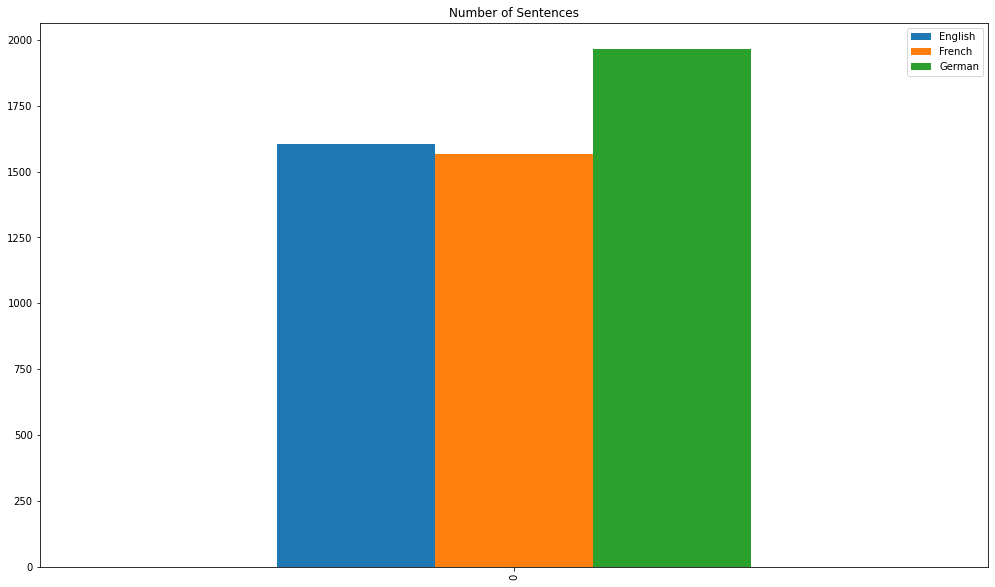

In [52]:
sentenceS.plot.bar()
plt.title('Number of Sentences')



Text(0.5, 1.0, 'Number of Words')

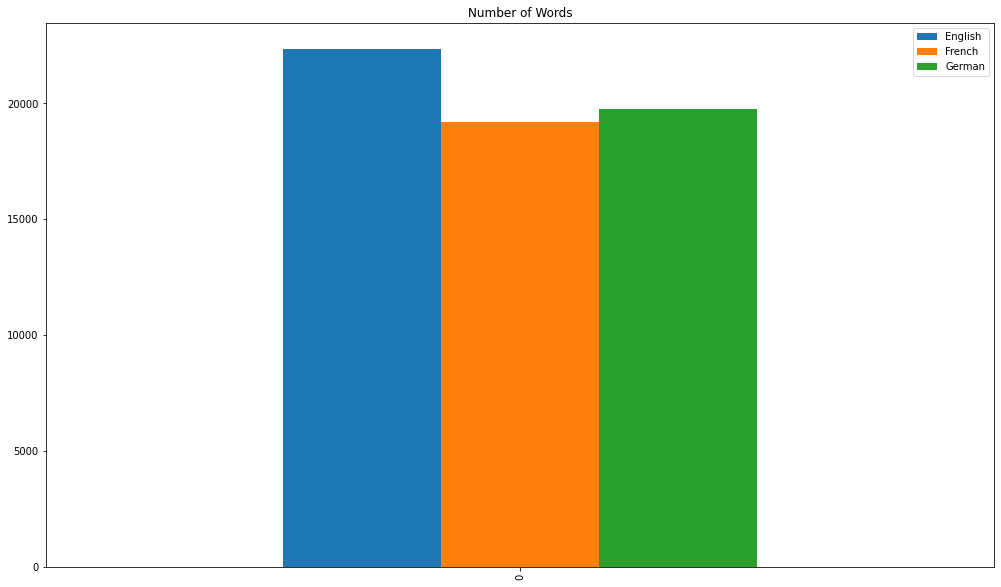

In [53]:
occurence_language.plot.bar()
plt.title('Number of Words')


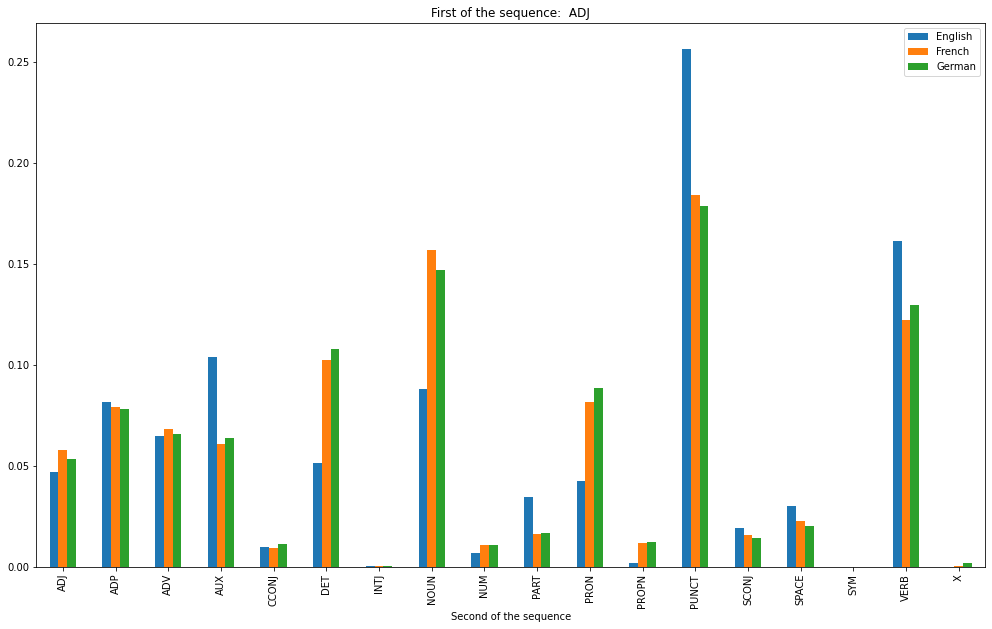

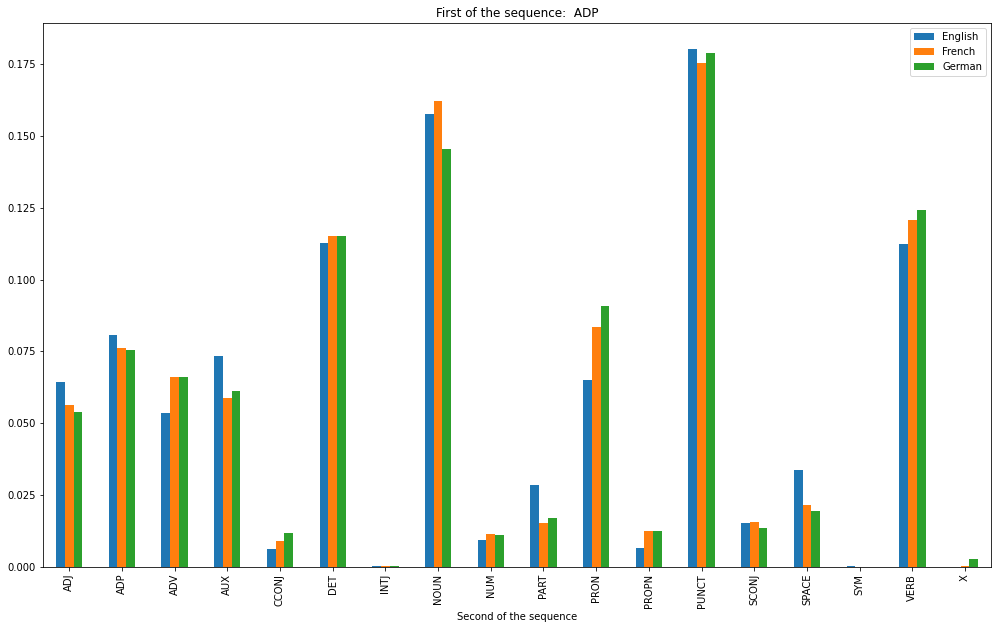

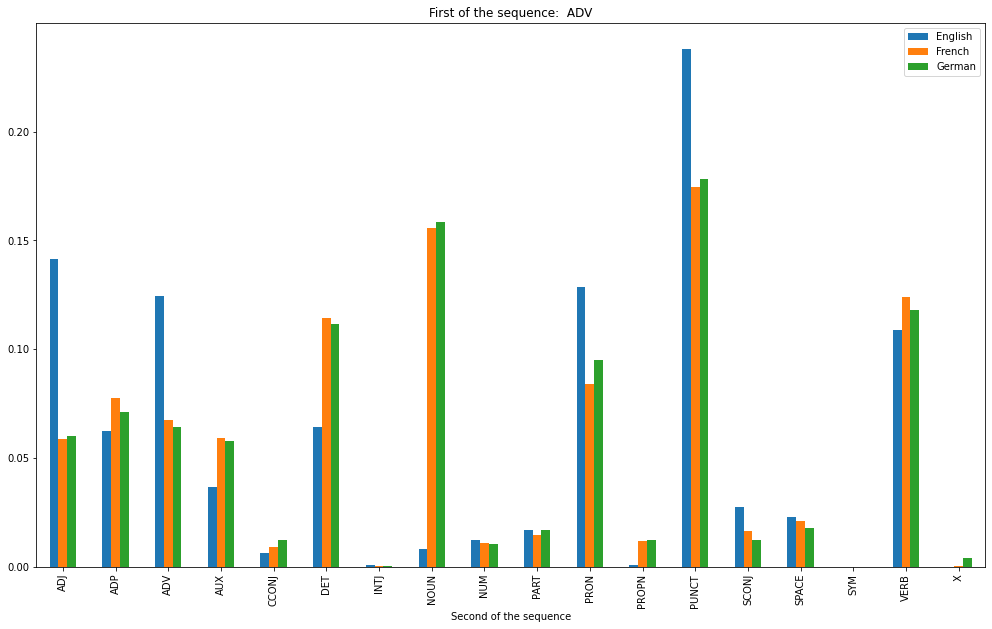

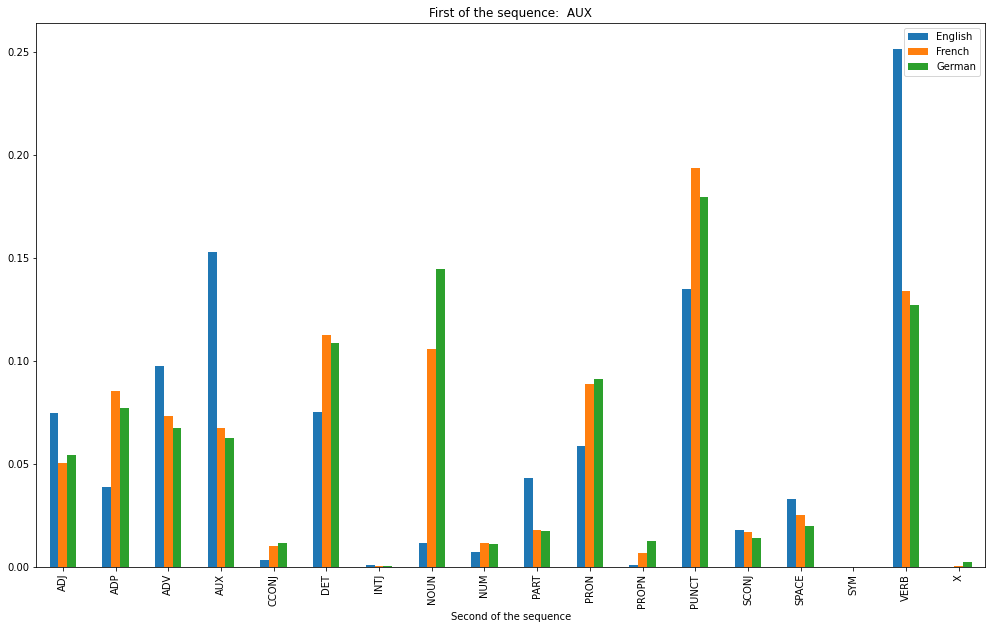

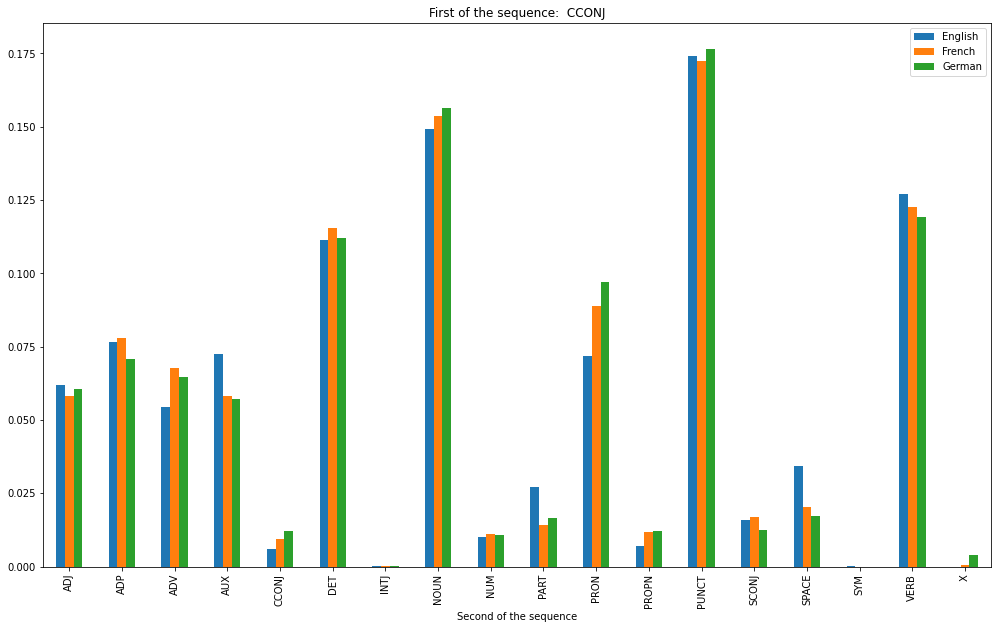

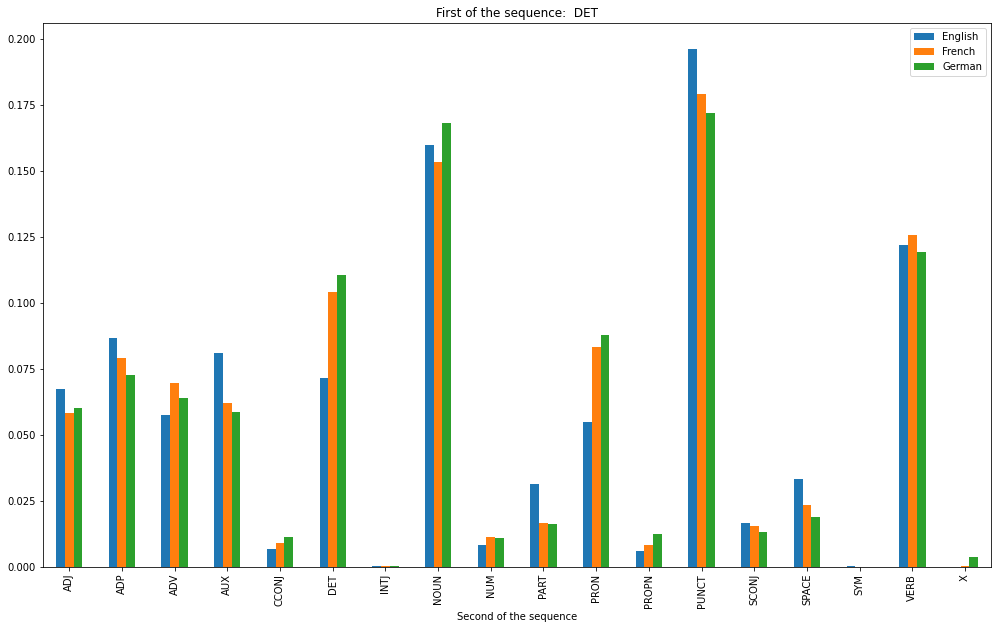

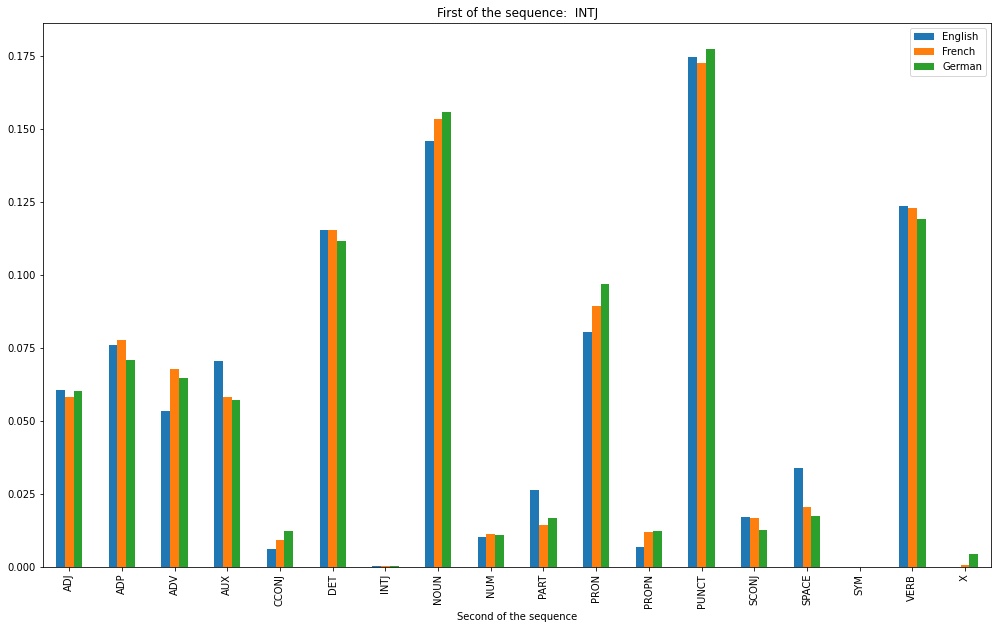

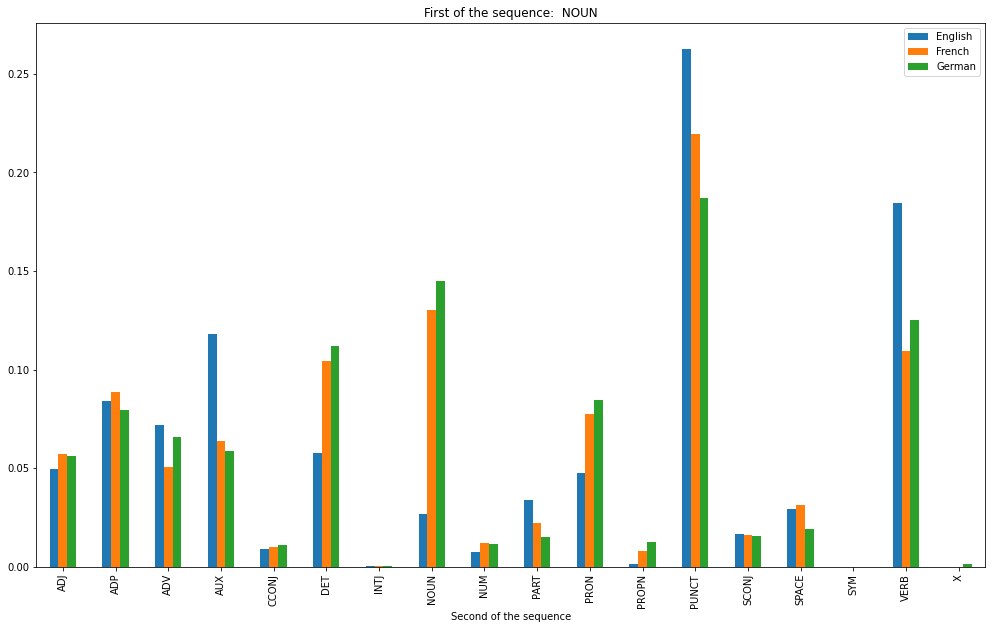

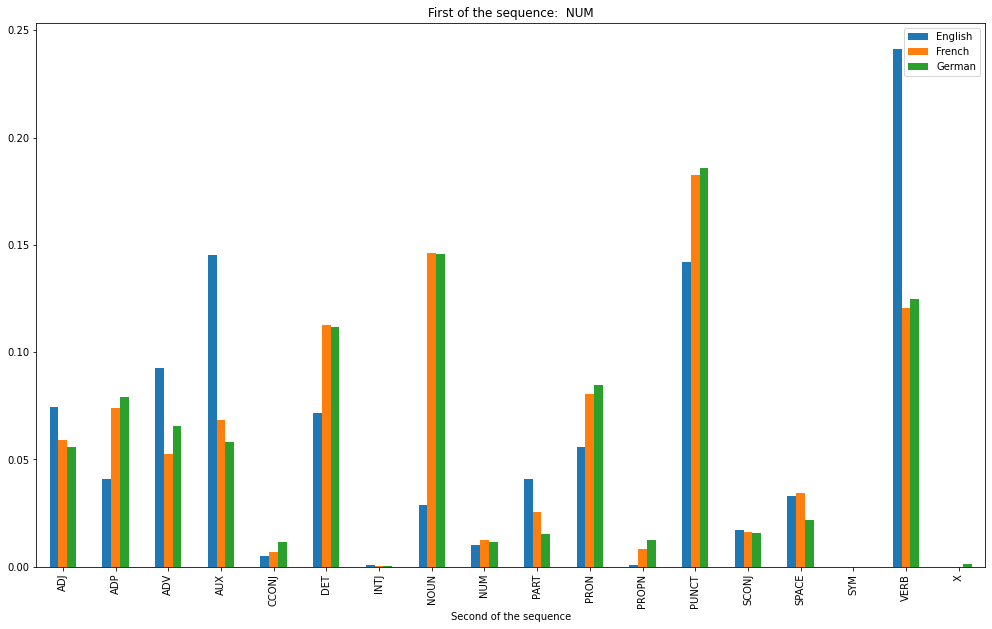

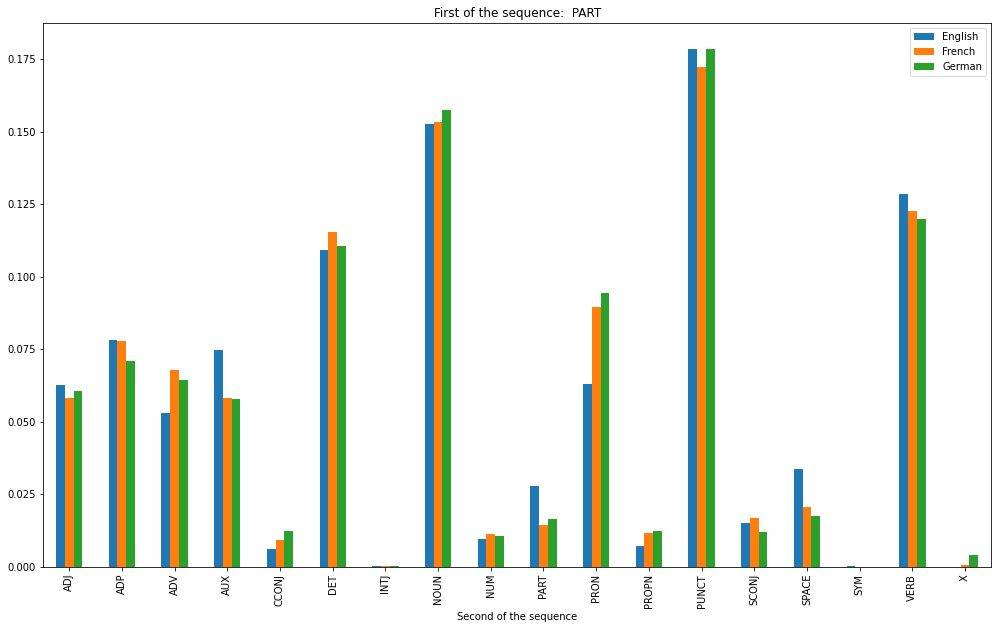

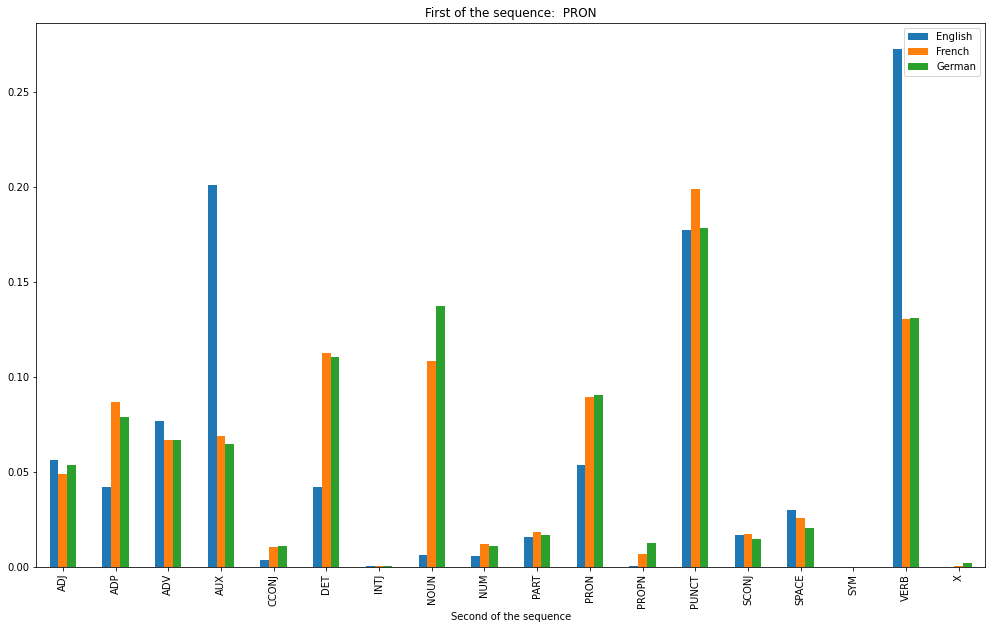

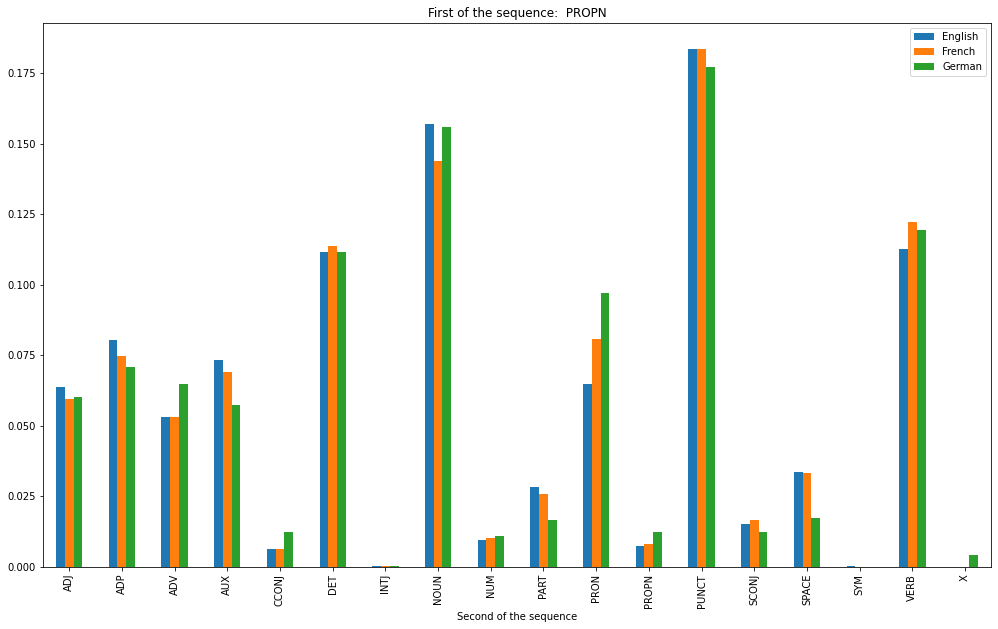

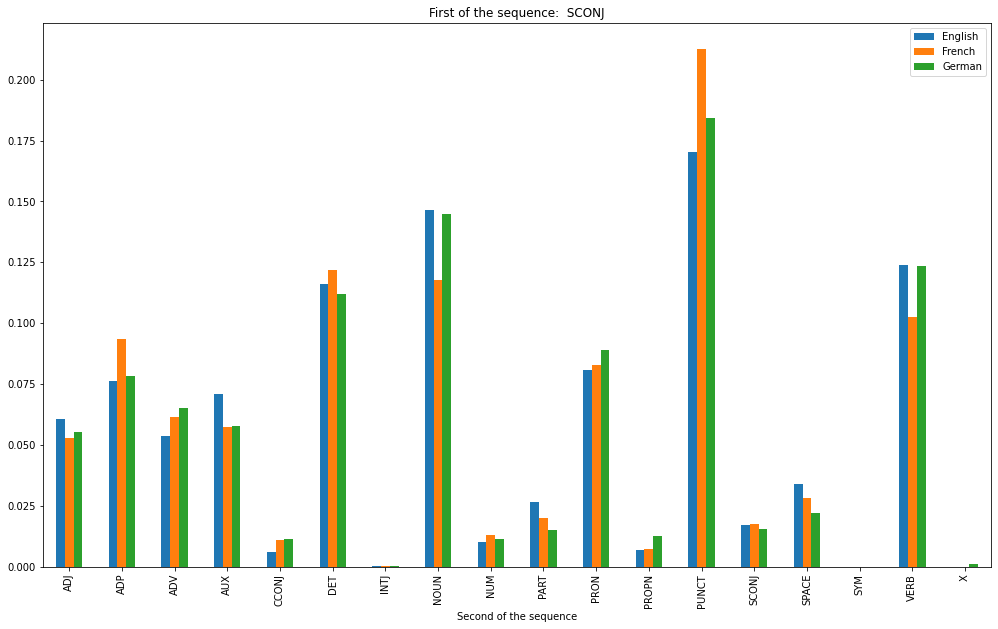

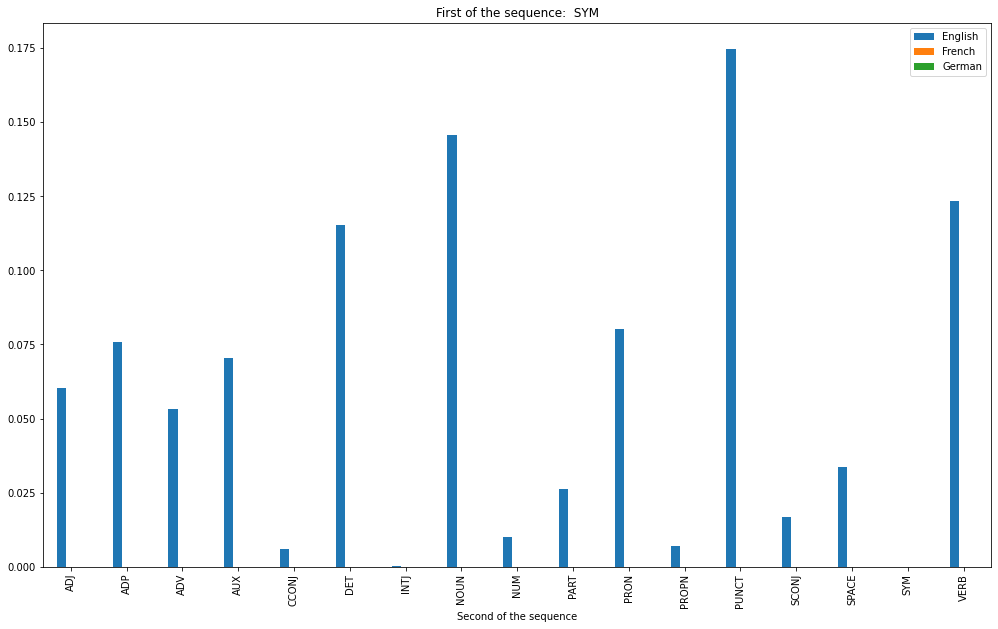

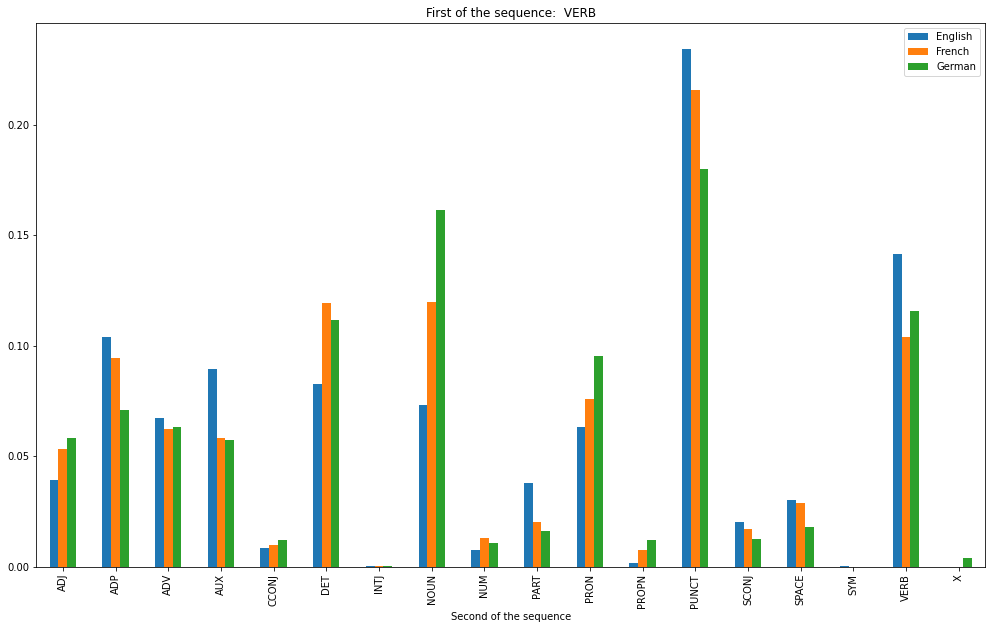

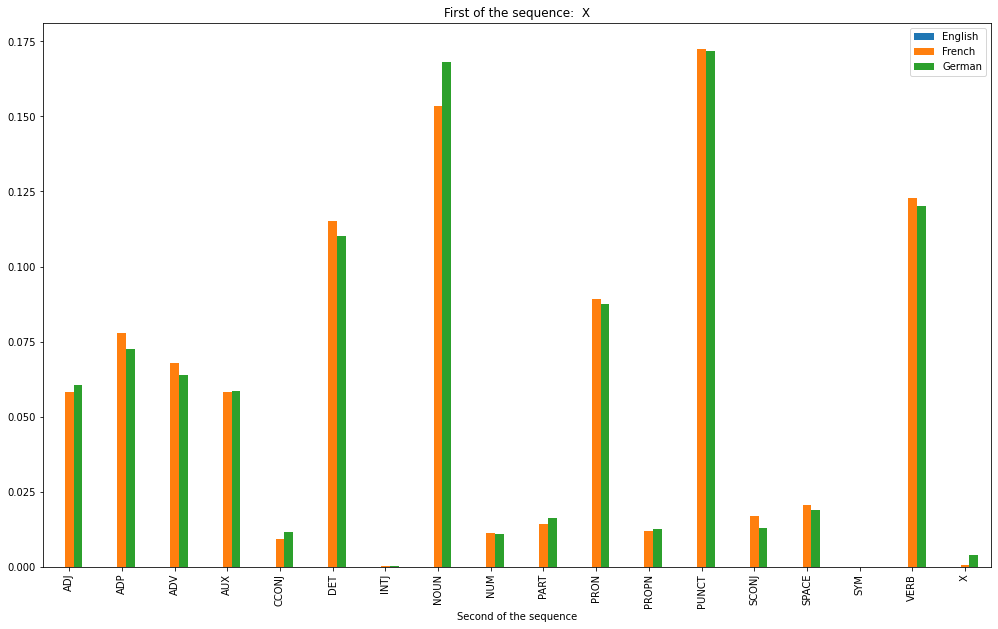

In [56]:
import matplotlib.pyplot as plt
for i in df_next_categorieS.reset_index()['level_0'].unique():
    (df_next_categorieS.xs(i,0,level=0)/df_next_categorieS.xs(i,0,level=0).sum()).plot.bar()
    plt.title('First of the sequence:  '+i)
    plt.xlabel('Second of the sequence')
    plt.show()